# Derive waiting time for each transaction included in the blockchain

## Data preprocessing for blockchain data

In [ ]:
# Timestamp of each block -- same as each tx's timestamp recorded in the corresponding block
block_data = pd.read_csv('/content/drive/My Drive/filter_mempool_data/block_data.csv', index_col=0)
block_data

number  Unix_timestamp
0       12738509    1.625098e+09
1       12738510    1.625098e+09
2       12738511    1.625098e+09
3       12738512    1.625098e+09
4       12738513    1.625098e+09
...          ...             ...
766486  13504995    1.635414e+09
766487  13504996    1.635414e+09
766488  13504997    1.635414e+09
766489  13504998    1.635414e+09
766490  13504999    1.635414e+09

[766491 rows x 2 columns]

In [ ]:
# hash of each tx -- one-on-one correspondence with the tx indicated in the mempool
df_transactions = pd.read_csv('/content/drive/My Drive/filter_mempool_data/tx_[2021081600,2021082800).csv', index_col=0)
df_transactions["next_block_number"] = df_transactions["block_number"] + 1
df_transactions

hash  block_number  \
0         0x6cbbad6fa567eb933872c2b401283f9a90016e83f46c...      13098488   
1         0xdc8a4df4e924d9404deeb2bc6154525a43dccb77bf0f...      13098488   
2         0x11ea3ba2258c58c710fa2f8cd4b769e0b148e670e33f...      13098744   
3         0x5feecec3863b4e6f8d820eb34df762cddbb89d24c165...      13099256   
4         0x6006b5d3aa589b99547ea5ca411036f9b83688c839e9...      13099768   
...                                                     ...           ...   
14565418  0x1e48f43f6d412a5df40b0cc4c7aa811a500912761e5e...      13059035   
14565419  0x7a96399a4bd5adf8ba6492b48c4e3b3e08076096d7e5...      13062367   
14565420  0x31d7207bc44a660959f4ea0cfcbc00e06511e0718ed7...      13062113   
14565421  0x5589e1b9d403b00783705c26d0706a4ddf765d218243...      13061091   
14565422  0x72372d6be4e42f383aff259ee714efc52555e313293e...      13059052   

            gas_price  next_block_number  
0         82069919234           13098489  
1         82069919234           13098489  
2         63333363498           13098745  
3         66063911419           13099257  
4         72832692987           13099769  
...               ...                ...  
14565418  48000000000           13059036  
14565419  48000000000           13062368  
14565420  48000000000           13062114  
14565421  48000000000           13061092  
14565422  48000000000           13059053  

[14565423 rows x 4 columns]

In [ ]:
# merge block and tx data
blockchain_data = df_transactions.merge(block_data, left_on="next_block_number", right_on="number")
blockchain_data = blockchain_data[['hash', 'Unix_timestamp', 'gas_price', 'number']].sort_values('Unix_timestamp', axis=0, ascending=True).reset_index(drop=True)
blockchain_data

hash  Unix_timestamp  \
0         0x5033241a6ea830380e39324062779d17d77a0b0842d8...    1.629072e+09   
1         0x2771fd3b96ff380245641e51fd92b1ed492f831655d5...    1.629072e+09   
2         0x30393acef08d462ee47bf503de5a426ad068252616f0...    1.629072e+09   
3         0x7d985747e65e6b31b54a9476a7bc32e678ac60bfec85...    1.629072e+09   
4         0x70841203d4cedac69330fe1c1f9b0952dbd3cf431ff3...    1.629072e+09   
...                                                     ...             ...   
14565418  0x79c323a1e3572f730217e32cc8c7f90e0efa29c86566...    1.630109e+09   
14565419  0x3820ea728dfce5f0784335c607773e0650018d2d3245...    1.630109e+09   
14565420  0x49f112fc24b42bca98bf867b8c7aeb20ca1bbc9f55d5...    1.630109e+09   
14565421  0x4ee33b6af29e33fa80b91be298ffb27a6da06917ff26...    1.630109e+09   
14565422  0x00c9bf99d3b623a1ea079abbc5c0af74b9f8b3a7a9af...    1.630109e+09   

             gas_price    number  
0          43538780365  13032881  
1          51151219489  13032881  
2          46000000000  13032881  
3          52663526848  13032881  
4          81000000000  13032881  
...                ...       ...  
14565418  505536669108  13110563  
14565419  506036669108  13110563  
14565420  606238216894  13110563  
14565421  505536669108  13110563  
14565422  585000000000  13110563  

[14565423 rows x 4 columns]

In [ ]:
legacy_blockchain_data = blockchain_data.loc[blockchain_data['Unix_timestamp'] <= 1628166822]
legacy_blockchain_data

Empty DataFrame
Columns: [hash, Unix_timestamp, gas_price, number]
Index: []

In [ ]:
lf_blockchain_data = blockchain_data.loc[blockchain_data['Unix_timestamp'] > 1628166822].reset_index(drop=True)
lf_blockchain_data

hash  Unix_timestamp  \
0         0x5033241a6ea830380e39324062779d17d77a0b0842d8...    1.629072e+09   
1         0x2771fd3b96ff380245641e51fd92b1ed492f831655d5...    1.629072e+09   
2         0x30393acef08d462ee47bf503de5a426ad068252616f0...    1.629072e+09   
3         0x7d985747e65e6b31b54a9476a7bc32e678ac60bfec85...    1.629072e+09   
4         0x70841203d4cedac69330fe1c1f9b0952dbd3cf431ff3...    1.629072e+09   
...                                                     ...             ...   
14565418  0x79c323a1e3572f730217e32cc8c7f90e0efa29c86566...    1.630109e+09   
14565419  0x3820ea728dfce5f0784335c607773e0650018d2d3245...    1.630109e+09   
14565420  0x49f112fc24b42bca98bf867b8c7aeb20ca1bbc9f55d5...    1.630109e+09   
14565421  0x4ee33b6af29e33fa80b91be298ffb27a6da06917ff26...    1.630109e+09   
14565422  0x00c9bf99d3b623a1ea079abbc5c0af74b9f8b3a7a9af...    1.630109e+09   

             gas_price    number  
0          43538780365  13032881  
1          51151219489  13032881  
2          46000000000  13032881  
3          52663526848  13032881  
4          81000000000  13032881  
...                ...       ...  
14565418  505536669108  13110563  
14565419  506036669108  13110563  
14565420  606238216894  13110563  
14565421  505536669108  13110563  
14565422  585000000000  13110563  

[14565423 rows x 4 columns]

## Data preprocessing for mempool data

In [ ]:
# Read the mempool data with corresponding timeframe
mempool = pd.DataFrame(columns = ['hash', 'Unix Timestamp', 'mempool'])
#date_list = ['0725','0726','0727','0728','0729','0730','0731','0801','0802','0803','0804','0805','0806']
date_list = ['0816','0817','0818','0819','0820','0821','0822','0823','0824','0825','0826','0827','0828']
#date_list = ['0828','0829','0830','0831','0901','0902','0903','0904','0905','0906','0907','0908','0909','0910','0911','0912','0913']
#date_list = ['0913','0914','0915','0916','0917','0918','0919','0920','0921','0922','0923','0924','0925','0926','0927','0928']
#date_list = ['0928','0929','0930','1001','1002','1003','1004','1005','1006','1007','1008','1009','1010','1011','1012','1013']
#date_list = ['1013','1014','1015','1016','1017','1018','1019','1020','1021','1022','1023','1024','1025','1026','1027','1028','1029','1030','1031','1101']

for i in range (len(date_list)-1):
  new_data = pd.read_csv(f'/content/drive/My Drive/filter_mempool_data/filter_2021{date_list[i]}00 2021{date_list[i+1]}00).csv', index_col=0)
  mempool = mempool.append(new_data)

In [ ]:
mempool

hash  Unix Timestamp  \
0       0x00000179418366ce1c8b0070f0ca74a8098b9732f24b...    1.629132e+09   
1       0x000012443b021e2abd57c0ac8daf99606770bc597e53...    1.629103e+09   
2       0x000031eb65c71494c7e1c1b0a0ae20cae83ed7bf82db...    1.629096e+09   
3       0x00003f9001f7d4c84b10dc84fe5f92bc766b774e5718...    1.629132e+09   
4       0x00004775da14eddba2d633255bc834dbd1e11522cc12...    1.629136e+09   
...                                                   ...             ...   
999495  0xffff80181fcbbe103fe3a0aeaf20444c9b131f42e115...    1.629820e+09   
999496  0xffff92adbc4ec46e60d9ef6c596cbfa05b791182d8bf...    1.629836e+09   
999497  0xffff9bca1901ec3c9d8e392f20e739a428f5874fae53...    1.629838e+09   
999498  0xffffc86c64c6719c94eb50e36a90635097a8ad8c5f13...    1.629850e+09   
999499  0xffffe88066bbf63b170148cf435080807ffabf50ce4e...    1.629848e+09   

         mempool  
0       Triangle  
1       Triangle  
2       Montreal  
3       Montreal  
4       Triangle  
...          ...  
999495  Triangle  
999496  Montreal  
999497  Montreal  
999498  Montreal  
999499  Montreal  

[12120584 rows x 3 columns]

## Data Analysis: Merge between mempool and blockchain data and Calculate waiting time

In [ ]:
# Merge by the unique identifier -- hash
merged = mempool.merge(blockchain_data, left_on="hash", right_on="hash")
merged["waiting_time (s)"] = merged["Unix_timestamp"] - merged["Unix Timestamp"]
merged["gas_price (gwei)"] = merged["gas_price"]/1000000000
merged

hash  Unix Timestamp  \
0         0x00000179418366ce1c8b0070f0ca74a8098b9732f24b...    1.629132e+09   
1         0x00003f9001f7d4c84b10dc84fe5f92bc766b774e5718...    1.629132e+09   
2         0x00004775da14eddba2d633255bc834dbd1e11522cc12...    1.629136e+09   
3         0x00004d0b1a4315d0983ba574ce4ff5f72c258278cd7f...    1.629118e+09   
4         0x00008be6ec899a95267e0b0463be36d0f5917eac7f19...    1.629109e+09   
...                                                     ...             ...   
10745231  0xffff80181fcbbe103fe3a0aeaf20444c9b131f42e115...    1.629820e+09   
10745232  0xffff92adbc4ec46e60d9ef6c596cbfa05b791182d8bf...    1.629836e+09   
10745233  0xffff9bca1901ec3c9d8e392f20e739a428f5874fae53...    1.629838e+09   
10745234  0xffffc86c64c6719c94eb50e36a90635097a8ad8c5f13...    1.629850e+09   
10745235  0xffffe88066bbf63b170148cf435080807ffabf50ce4e...    1.629848e+09   

           mempool  Unix_timestamp     gas_price    number  waiting_time (s)  \
0         Triangle    1.629132e+09   63000000000  13037350            83.637   
1         Montreal    1.629132e+09   93000000000  13037327             2.895   
2         Triangle    1.629136e+09   68000000000  13037616             5.580   
3         Montreal    1.629118e+09   91828461946  13036345            46.341   
4         Montreal    1.629109e+09   45441723097  13035659             5.578   
...            ...             ...           ...       ...               ...   
10745231  Triangle    1.629820e+09   77000000000  13088946            90.901   
10745232  Montreal    1.629836e+09   92453332524  13090227            17.289   
10745233  Montreal    1.629838e+09  100100000000  13090314            52.899   
10745234  Montreal    1.629850e+09   97794804734  13091242             4.666   
10745235  Montreal    1.629848e+09   73700000000  13091029             6.768   

          gas_price (gwei)  
0                63.000000  
1                93.000000  
2                68.000000  
3                91.828462  
4                45.441723  
...                    ...  
10745231         77.000000  
10745232         92.453333  
10745233        100.100000  
10745234         97.794805  
10745235         73.700000  

[10745236 rows x 8 columns]

# Visualization

## Part I: Tx-level Waiting Time and Minimum Waiting Time Visualization

In [ ]:
min_waitingtime = merged.groupby(['number'])['waiting_time (s)'].min().to_frame()
min_waitingtime = min_waitingtime.loc[min_waitingtime['waiting_time (s)'] <= 60]
#min_waitingtime = min_waitingtime.loc[(min_waitingtime['waiting_time (s)'] >= 0) &(min_waitingtime['waiting_time (s)'] <= 60)]
min_waitingtime[min_waitingtime < 0] = 0
min_waitingtime

waiting_time (s)
number                    
13033962             0.152
13033963             0.747
13033964             0.313
13033965             4.276
13033966             1.531
...                    ...
13093444             0.041
13093445             0.418
13093446             0.680
13093447            38.426
13093448            57.436

[58521 rows x 1 columns]

In [ ]:
min_waitingtime.loc[min_waitingtime['waiting_time (s)'] < 0]

Empty DataFrame
Columns: [waiting_time (s)]
Index: []

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



[Text(0.5, 1.0, 'Minimum Waiting Time Distribution (2021/07/25-2021/08/05), adjusted by setting negative waiting times to 0')]

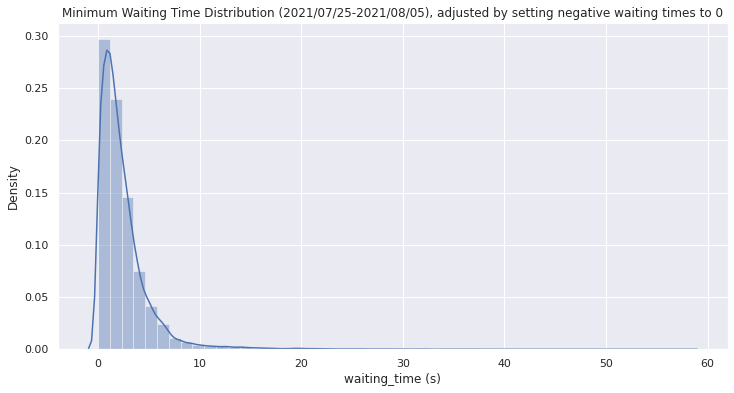

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,6)})
sns.distplot(min_waitingtime['waiting_time (s)'], hist=True, kde=True).set(title='Minimum Waiting Time Distribution (2021/07/25-2021/08/05), adjusted by setting negative waiting times to 0')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Minimum Waiting Time Boxplot (2021/07/25-2021/08/05), adjusted by setting negative waiting times to 0')]

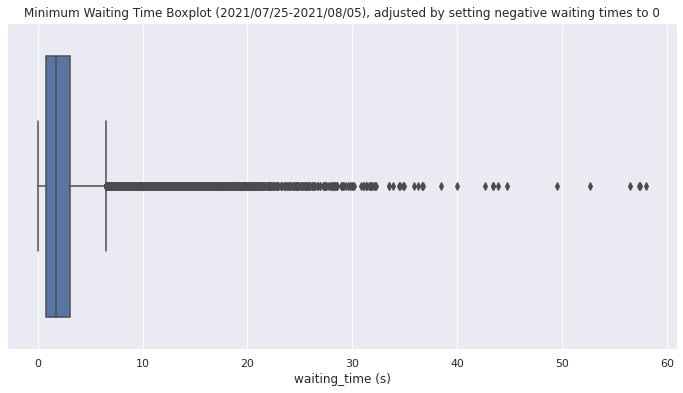

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.boxplot(min_waitingtime['waiting_time (s)']).set(title='Minimum Waiting Time Boxplot (2021/07/25-2021/08/05), adjusted by setting negative waiting times to 0')

In [ ]:
#merged[merged['waiting_time (s)'] < 0] = 0
merged = merged.loc[(merged['waiting_time (s)'] >= 0) &(merged['waiting_time (s)'] <= 60)]
merged

hash  Unix Timestamp  \
1         0x00003f9001f7d4c84b10dc84fe5f92bc766b774e5718...    1.629132e+09   
2         0x00004775da14eddba2d633255bc834dbd1e11522cc12...    1.629136e+09   
3         0x00004d0b1a4315d0983ba574ce4ff5f72c258278cd7f...    1.629118e+09   
4         0x00008be6ec899a95267e0b0463be36d0f5917eac7f19...    1.629109e+09   
6         0x0000a647b252ee59f8edf633393114294a3b7355f41c...    1.629126e+09   
...                                                     ...             ...   
10745230  0xffff75962786694e1f4416865a6629c17482a9e01a32...    1.629870e+09   
10745232  0xffff92adbc4ec46e60d9ef6c596cbfa05b791182d8bf...    1.629836e+09   
10745233  0xffff9bca1901ec3c9d8e392f20e739a428f5874fae53...    1.629838e+09   
10745234  0xffffc86c64c6719c94eb50e36a90635097a8ad8c5f13...    1.629850e+09   
10745235  0xffffe88066bbf63b170148cf435080807ffabf50ce4e...    1.629848e+09   

           mempool  Unix_timestamp     gas_price    number  waiting_time (s)  \
1         Montreal    1.629132e+09   93000000000  13037327             2.895   
2         Triangle    1.629136e+09   68000000000  13037616             5.580   
3         Montreal    1.629118e+09   91828461946  13036345            46.341   
4         Montreal    1.629109e+09   45441723097  13035659             5.578   
6         Montreal    1.629126e+09   79000000000  13036924             2.322   
...            ...             ...           ...       ...               ...   
10745230  Triangle    1.629870e+09   64000000000  13092702            19.455   
10745232  Montreal    1.629836e+09   92453332524  13090227            17.289   
10745233  Montreal    1.629838e+09  100100000000  13090314            52.899   
10745234  Montreal    1.629850e+09   97794804734  13091242             4.666   
10745235  Montreal    1.629848e+09   73700000000  13091029             6.768   

          gas_price (gwei)  
1                93.000000  
2                68.000000  
3                91.828462  
4                45.441723  
6                79.000000  
...                    ...  
10745230         64.000000  
10745232         92.453333  
10745233        100.100000  
10745234         97.794805  
10745235         73.700000  

[9240565 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



[Text(0.5, 1.0, 'Waiting Time Distribution (2021/08/16-2021/08/27), adjusted by removing negative waiting times')]

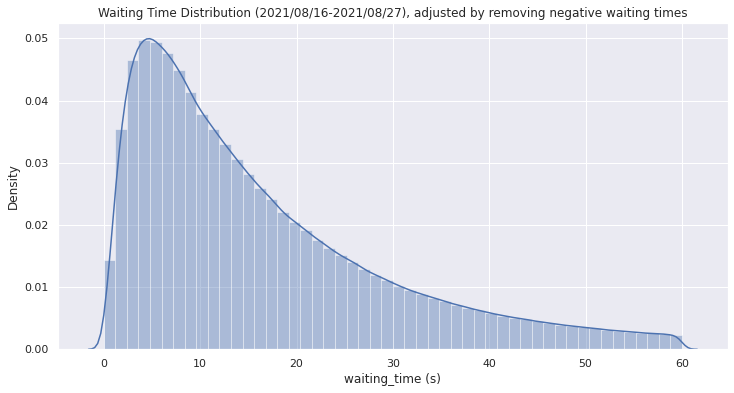

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,6)})
sns.distplot(merged['waiting_time (s)'], hist=True, kde=True).set(title='Waiting Time Distribution (2021/08/16-2021/08/27), adjusted by removing negative waiting times')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Waiting Time Boxplot (2021/08/16-2021/08/27), adjusted by removing negative waiting times')]

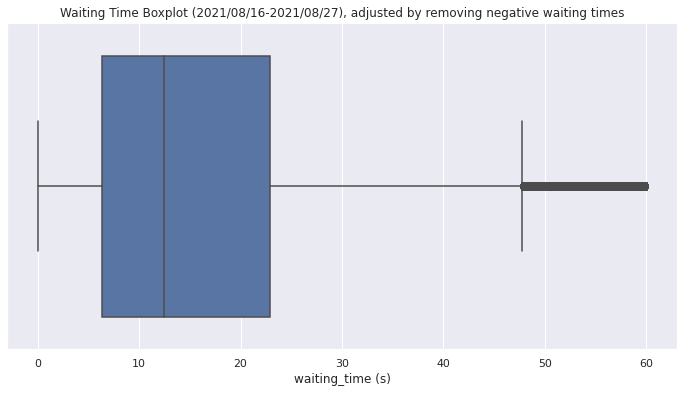

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.boxplot(merged['waiting_time (s)']).set(title='Waiting Time Boxplot (2021/08/16-2021/08/27), adjusted by removing negative waiting times')

## Part II: Median waiting time comparison between Pre-EIP and Post-EIP period

In [ ]:
#merged = merged.loc[(merged['waiting_time (s)'] >= 0) &(merged['waiting_time (s)'] <= 60)]
merged = merged.loc[merged['waiting_time (s)'] >= 0]
merged

hash  Unix Timestamp  \
0         0x00000179418366ce1c8b0070f0ca74a8098b9732f24b...    1.629132e+09   
1         0x00003f9001f7d4c84b10dc84fe5f92bc766b774e5718...    1.629132e+09   
2         0x00004775da14eddba2d633255bc834dbd1e11522cc12...    1.629136e+09   
3         0x00004d0b1a4315d0983ba574ce4ff5f72c258278cd7f...    1.629118e+09   
4         0x00008be6ec899a95267e0b0463be36d0f5917eac7f19...    1.629109e+09   
...                                                     ...             ...   
10745231  0xffff80181fcbbe103fe3a0aeaf20444c9b131f42e115...    1.629820e+09   
10745232  0xffff92adbc4ec46e60d9ef6c596cbfa05b791182d8bf...    1.629836e+09   
10745233  0xffff9bca1901ec3c9d8e392f20e739a428f5874fae53...    1.629838e+09   
10745234  0xffffc86c64c6719c94eb50e36a90635097a8ad8c5f13...    1.629850e+09   
10745235  0xffffe88066bbf63b170148cf435080807ffabf50ce4e...    1.629848e+09   

           mempool  Unix_timestamp     gas_price    number  waiting_time (s)  \
0         Triangle    1.629132e+09   63000000000  13037350            83.637   
1         Montreal    1.629132e+09   93000000000  13037327             2.895   
2         Triangle    1.629136e+09   68000000000  13037616             5.580   
3         Montreal    1.629118e+09   91828461946  13036345            46.341   
4         Montreal    1.629109e+09   45441723097  13035659             5.578   
...            ...             ...           ...       ...               ...   
10745231  Triangle    1.629820e+09   77000000000  13088946            90.901   
10745232  Montreal    1.629836e+09   92453332524  13090227            17.289   
10745233  Montreal    1.629838e+09  100100000000  13090314            52.899   
10745234  Montreal    1.629850e+09   97794804734  13091242             4.666   
10745235  Montreal    1.629848e+09   73700000000  13091029             6.768   

          gas_price (gwei)  
0                63.000000  
1                93.000000  
2                68.000000  
3                91.828462  
4                45.441723  
...                    ...  
10745231         77.000000  
10745232         92.453333  
10745233        100.100000  
10745234         97.794805  
10745235         73.700000  

[10710186 rows x 8 columns]

In [ ]:
median_waitingtime = merged.groupby(['number'])['waiting_time (s)'].median().to_frame()
#median_waitingtime.to_csv('/content/drive/My Drive/filter_mempool_data/median_wt_after.csv')
median_waitingtime

waiting_time (s)
number                    
13033962            2.5865
13033963           18.4220
13033964           21.1960
13033965            7.1190
13033966           13.0430
...                    ...
13110426       339996.0980
13110449       329527.5150
13110451       294685.5790
13110459       272461.8950
13110466       354347.7330

[59719 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Median Waiting Time Distribution (2021/08/16-2021/08/27)')]

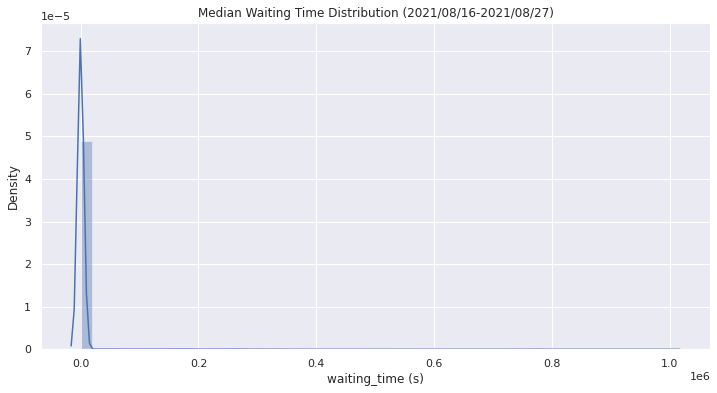

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,6)})
sns.distplot(median_waitingtime['waiting_time (s)'], hist=True, kde=True).set(title='Median Waiting Time Distribution (2021/08/16-2021/08/27)')

In [ ]:
import pandas as pd
median_wt_before = pd.read_csv('/content/drive/My Drive/filter_mempool_data/median_wt_before.csv')
#median_wt_afterwards = pd.read_csv('/content/drive/My Drive/EIPsimulation/Data/median_wt_afterwards.csv')
median_wt_after = pd.read_csv('/content/drive/My Drive/filter_mempool_data/median_wt_after.csv')
median_wt_before['EIP'] = 0
median_wt_after['EIP'] = 1
#median_wt_afterwards['EIP'] = 1
#median_wt = median_wt_before.append(median_wt_after.append(median_wt_afterwards))
median_wt = median_wt_before.append(median_wt_after)
median_wt = median_wt.loc[median_wt['waiting_time (s)'] <= 60]
median_wt

number  waiting_time (s)  EIP
0      12894015           14.9430    0
1      12894016           17.1860    0
2      12894017           10.4000    0
3      12894018           15.3590    0
4      12894019           30.6200    0
...         ...               ...  ...
58520  13093441            6.9270    1
58521  13093442           53.0195    1
58522  13093443            5.1430    1
58523  13093444            2.3680    1
58524  13093445           58.6790    1

[116160 rows x 3 columns]

In [ ]:
median_wt["London Hardfork"] = median_wt["EIP"]
median_wt.loc[median_wt["London Hardfork"] == 0, "London Hardfork"] = " before London Hardfork"
median_wt.loc[median_wt["London Hardfork"] == 1, "London Hardfork"] = " after London Hardfork"

import plotly.express as px

fig_wtdis = px.histogram(median_wt, x="waiting_time (s)", color="London Hardfork", histnorm = "percent", marginal = "box", barmode='overlay', labels={"London Hardfork": ""})
fig_wtdis.update_layout(
    xaxis = dict(title="Median waiting time"),
    yaxis = dict(title = "percent"),
    font = dict(size = 24)
)
fig_wtdis.update_layout(legend=dict(
    yanchor="top",
    y=0.6,
    xanchor="left",
    x=0.7),
    font = dict(size = 24))
fig_wtdis.show()

### Calculate relevant statistics and make significance test

In [ ]:
reduction = (median_wt_before.median() - median_wt_after.median())/median_wt_before.median()
print(str(reduction['waiting_time (s)']*100)+'%')

35.161224350558065%


In [ ]:
# import packages for t-test
from scipy import stats
stats.ttest_ind(median_wt_after['waiting_time (s)'], median_wt_before['waiting_time (s)'], equal_var=False)

Ttest_indResult(statistic=24.99733833159398, pvalue=3.2988111321074037e-137)

## Part III: Median waiting time comparison between transactions before EIP, legacy transactions after EIP, EIP transactions

In [ ]:
tx_before = pd.read_csv('/content/drive/My Drive/filter_mempool_data/median_wt_before.csv', index_col=0).reset_index()
tx_before['transaction_type'] = 0.0

In [ ]:
tx_after = pd.read_csv('/content/drive/My Drive/filter_mempool_data/median_wt_after.csv', index_col=0)
tx_after

number  transaction_type  waiting_time (s)
0      13033962               2.0            2.0860
1      13033963               2.0           23.5980
2      13033964               2.0           21.5870
3      13033965               2.0            6.8460
4      13033966               2.0            4.1220
...         ...               ...               ...
36204  13064996               2.0           33.2880
36205  13064997               2.0           38.2645
36206  13064998               2.0           14.9540
36207  13064999               2.0            7.7710
36208  13065000               2.0            2.6565

[36209 rows x 3 columns]

In [ ]:
wt = tx_before.append(tx_after)
wt = wt.loc[wt['waiting_time (s)'] <= 60]
wt = wt.loc[wt['waiting_time (s)'] >= 0]
wt

number  waiting_time (s)  transaction_type
0      12894015           14.9430               0.0
1      12894016           17.1860               0.0
2      12894017           10.4000               0.0
3      12894018           15.3590               0.0
4      12894019           30.6200               0.0
...         ...               ...               ...
36204  13064996           33.2880               2.0
36205  13064997           38.2645               2.0
36206  13064998           14.9540               2.0
36207  13064999            7.7710               2.0
36208  13065000            2.6565               2.0

[95315 rows x 3 columns]

In [ ]:
wt["London Hardfork"] = wt["transaction_type"]
wt.loc[wt["London Hardfork"] == 0.0, "London Hardfork"] = " before London Hardfork"
wt.loc[wt["London Hardfork"] == 1.0, "London Hardfork"] = " after London Hardfork - legacy"
wt.loc[wt["London Hardfork"] == 2.0, "London Hardfork"] = " after London Hardfork - EIP"


import plotly.express as px

fig_wtdis = px.histogram(wt, x="waiting_time (s)", color="London Hardfork", histnorm = "percent", marginal = "box", barmode='overlay', labels={"London Hardfork": ""})
fig_wtdis.update_layout(
    xaxis = dict(title="Median waiting time"),
    yaxis = dict(title = "percent"),
    font = dict(size = 24)
)
fig_wtdis.update_layout(legend=dict(
    yanchor="top",
    y=0.6,
    xanchor="left",
    x=0.7),
    font = dict(size = 24))
fig_wtdis.show()